In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Users/stevengeorge/Documents/Github/fpl-analysis/')

__TODO: Rename gw DataFrame to gw2 or generic name__ 

In [2]:
gw1_v1_player_predictions = pd.read_parquet(r'data/gw_predictions/gw10_v1_lstm_player_predictions.parquet')
print(gw1_v1_player_predictions.shape)
gw1_v1_player_predictions.head()

(534, 13)


,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,sum
0,raheem_sterling,5.796896,5.507291,5.425216,5.215232,5.125874,0,0,0,1,Manchester City,12.1,27.070508
1,mohamed_salah,5.771259,5.482709,5.401489,5.191912,5.102997,0,0,0,1,Liverpool,12.4,26.950366
2,kevin_de bruyne,5.613489,5.325687,5.243348,5.039083,4.952039,0,0,0,1,Manchester City,10.1,26.173645
3,sadio_mané,5.457540,5.170874,5.087903,4.888676,4.803558,0,0,0,1,Liverpool,11.8,25.408551
4,pierre-emerick_aubameyang,5.448189,5.160607,5.076423,4.878020,4.792836,0,1,0,0,Arsenal,11.1,25.356074


In [3]:
gw1_v1_player_predictions.rename(columns={'sum': 'predictions'}, inplace=True)

In [4]:
plot_df = pd.melt(gw1_v1_player_predictions[['name', 'GW_plus_1', 'GW_plus_2', 'GW_plus_3', 'GW_plus_4', 'GW_plus_5']], id_vars=['name'])
plot_df.rename(columns={'variable': 'GW', 'value': 'prediction'}, inplace=True)
plot_df.head()

,name,GW,prediction
0,raheem_sterling,GW_plus_1,5.796896
1,mohamed_salah,GW_plus_1,5.771259
2,kevin_de bruyne,GW_plus_1,5.613489
3,sadio_mané,GW_plus_1,5.457540
4,pierre-emerick_aubameyang,GW_plus_1,5.448189


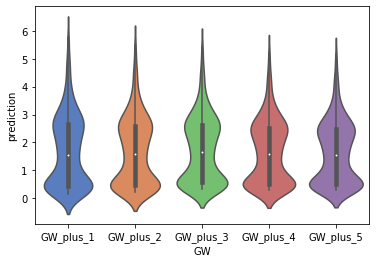

In [5]:
sns.violinplot(x="GW", y="prediction", data=plot_df, palette="muted", split=True)

In [6]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

__Need to do manual overwrite - looks like price just changed!__

In [7]:
# Keep Maddison in the team!
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'james_maddison', 'predictions'] = 100

In [8]:
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'patrick_van_aanholt', 'next_match_value'] = 5.5
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'joshua_king', 'next_match_value'] = 6.3
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'trent_alexander_arnold', 'next_match_value'] = 7.0
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'ashley_barnes', 'next_match_value'] = 6.6
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'james_maddison', 'next_match_value'] = 7.1

In [9]:
# Set predictions for known injured players to large negative number to force algorithm to subsitute them out of squad
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name']=='aymeric_laporte', 'predictions'] = -9999
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name']=='nathan_redmond', 'predictions'] = -9999

In [10]:
# GW8 as Free Hit was used in GW9
gw8_team_selection = pd.read_parquet('data/gw_team_selections/gw8_v2_2_team_selections.parquet')
gw8_team_selection['in_current_team'] = 1
gw8_team_selection

,name,position_DEF,position_FWD,position_GK,position_MID,predictions,next_match_value,in_gw_1_team,team_name_Arsenal,team_name_Aston Villa,...,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11,in_current_team
0,mohamed_salah,0,0,0,1,3.515319,12.5,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
1,callum_wilson,0,1,0,0,3.502761,7.9,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
2,trent_alexander_arnold,1,0,0,0,3.096027,7.2,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
3,abdoulaye_doucouré,0,0,0,1,2.323266,5.7,1.0,0,0,...,0,0,0,0,0,1,0,0,1.0,1
4,joshua_king,0,1,0,0,2.254865,6.3,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
5,patrick_van_aanholt,1,0,0,0,2.180505,5.6,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
6,ashley_young,1,0,0,0,2.076955,5.4,1.0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
7,tom_heaton,0,0,1,0,2.052484,4.5,1.0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
8,joel_matip,1,0,0,0,-9999.000000,5.5,1.0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
9,hugo_lloris,0,0,1,0,1.928087,5.5,1.0,0,0,...,0,0,0,0,1,0,0,0,0.0,1


In [11]:
gw1_team = list(gw8_team_selection['name'])
gw1_team

['mohamed_salah',
 'callum_wilson',
 'trent_alexander_arnold',
 'abdoulaye_doucouré',
 'joshua_king',
 'patrick_van_aanholt',
 'ashley_young',
 'tom_heaton',
 'joel_matip',
 'hugo_lloris',
 'ashley_barnes',
 'james_maddison',
 'erik_lamela',
 'ricardo_domingos_barbosa_pereira',
 'david_silva']

In [12]:
len(gw1_team)

15

In [13]:
gw1_team_df = pd.DataFrame(
    {
        'name': gw1_team
    }
)
gw1_team_df['in_gw_1_team'] = 1

# Need to format here given that this was done at points prediction stage
gw1_team_df['name'] = gw1_team_df['name'].str.replace(' ', '_')
gw1_team_df['name'] = gw1_team_df['name'].str.replace('-', '_')

gw1_team_df

,name,in_gw_1_team
0,mohamed_salah,1
1,callum_wilson,1
2,trent_alexander_arnold,1
3,abdoulaye_doucouré,1
4,joshua_king,1
5,patrick_van_aanholt,1
6,ashley_young,1
7,tom_heaton,1
8,joel_matip,1
9,hugo_lloris,1


In [14]:
gw1_v1_player_predictions = gw1_v1_player_predictions.merge(gw1_team_df, on='name', how='left')
gw1_v1_player_predictions['in_gw_1_team'] = gw1_v1_player_predictions['in_gw_1_team'].fillna(0)
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,predictions,in_gw_1_team
0,raheem_sterling,5.796896,5.507291,5.425216,5.215232,5.125874,0,0,0,1,Manchester City,12.1,27.070508,0.0
1,mohamed_salah,5.771259,5.482709,5.401489,5.191912,5.102997,0,0,0,1,Liverpool,12.4,26.950366,1.0
2,kevin_de_bruyne,5.613489,5.325687,5.243348,5.039083,4.952039,0,0,0,1,Manchester City,10.1,26.173645,0.0
3,sadio_mané,5.457540,5.170874,5.087903,4.888676,4.803558,0,0,0,1,Liverpool,11.8,25.408551,0.0
4,pierre_emerick_aubameyang,5.448189,5.160607,5.076423,4.878020,4.792836,0,1,0,0,Arsenal,11.1,25.356074,0.0


__Create top 3 flag__

In [15]:
gw1_v1_player_predictions.loc[0:2, 'in_top_3'] = 1

In [16]:
gw1_v1_player_predictions['in_top_3'].fillna(0, inplace=True)

__Create low value player flag__

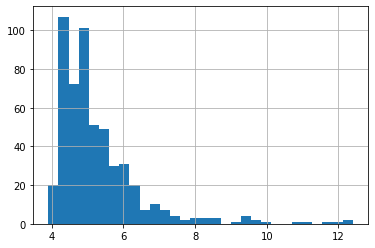

In [17]:
gw1_v1_player_predictions['next_match_value'].hist(bins=30)

In [20]:
gw1_v1_player_predictions[gw1_v1_player_predictions['next_match_value'] < 4.1].shape

(19, 15)

In [21]:
gw1_v1_player_predictions['low_value_player'] = np.where(
    gw1_v1_player_predictions['next_match_value'] < 4.1,
    1,
    0
)

In [22]:
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,predictions,in_gw_1_team,in_top_3,low_value_player
0,raheem_sterling,5.796896,5.507291,5.425216,5.215232,5.125874,0,0,0,1,Manchester City,12.1,27.070508,0.0,1.0,0
1,mohamed_salah,5.771259,5.482709,5.401489,5.191912,5.102997,0,0,0,1,Liverpool,12.4,26.950366,1.0,1.0,0
2,kevin_de_bruyne,5.613489,5.325687,5.243348,5.039083,4.952039,0,0,0,1,Manchester City,10.1,26.173645,0.0,1.0,0
3,sadio_mané,5.457540,5.170874,5.087903,4.888676,4.803558,0,0,0,1,Liverpool,11.8,25.408551,0.0,0.0,0
4,pierre_emerick_aubameyang,5.448189,5.160607,5.076423,4.878020,4.792836,0,1,0,0,Arsenal,11.1,25.356074,0.0,0.0,0


In [23]:
#budget = gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1]['next_match_value'].sum()
#budget = budget + 0.1  # money in the bank
budget = 98.9
budget

98.9

## Pick team

In [24]:
from pulp import *

In [25]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

In [26]:
team_names = gw1_v1_player_predictions['team_name'].unique()
gw1_v1_player_predictions = pd.get_dummies(gw1_v1_player_predictions, columns=['team_name'])
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,raheem_sterling,5.796896,5.507291,5.425216,5.215232,5.125874,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,mohamed_salah,5.771259,5.482709,5.401489,5.191912,5.102997,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,kevin_de_bruyne,5.613489,5.325687,5.243348,5.039083,4.952039,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,sadio_mané,5.457540,5.170874,5.087903,4.888676,4.803558,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,pierre_emerick_aubameyang,5.448189,5.160607,5.076423,4.878020,4.792836,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
players = list(gw1_v1_player_predictions['name'])

In [28]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            gw1_v1_player_predictions['name'],
            gw1_v1_player_predictions[f'team_name_{team}']
        )
    
    )

In [29]:
costs = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['next_match_value']
    )
)

In [30]:
predictions = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['predictions']
    )
)

In [31]:
DEF_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_FWD']
    )
)

GK_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_GK']
    )
)

MID_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_MID']
    )
)

In [32]:
GW1_team = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['in_gw_1_team']
    )
)

In [33]:
in_top_3 = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['in_top_3']
    )
)

In [34]:
low_value_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['low_value_player']
    )
)

In [35]:
prob = LpProblem('FPL team selection', LpMaximize)

In [36]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [37]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [38]:
# Constraints
prob += lpSum([costs[p] * player_vars[p] for p in players]) <= budget, "Total cost less than X"

#prob += lpSum([costs[p] * player_vars[p] for p in players]) >= (budget - 0.2), "Total cost greater than X"

prob += lpSum(player_vars[p] for p in players) == 15, "Select 15 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) == 5, "5 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 2, "2 goalkeepers"

prob += lpSum(MID_flag[p] * player_vars[p] for p in players) == 5, "5 midfielders"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) == 3, "3 forwards"

prob += lpSum(in_top_3[p] * player_vars[p] for p in players) == 3, "Top 3 must be included"

prob += lpSum(low_value_flag[p] * player_vars[p] for p in players) == 1, "Include 1 low value player"

#prob += lpSum(GW1_team[p] * player_vars[p] for p in players) >= 15, "at least X from original team i.e. max (15-X) transfers allowed"

for team in team_dict.keys():
    prob += lpSum(team_dict[team][p] * player_vars[p] for p in players) <= 3, f"Max 3 players in the same {team}"

In [39]:
prob.solve()

1

In [40]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_andrew_robertson = 1.0
player_danny_ings = 1.0
player_david_button = 1.0
player_diego_rico = 1.0
player_jack_grealish = 1.0
player_john_lundstram = 1.0
player_jordan_ayew = 1.0
player_kevin_de_bruyne = 1.0
player_lewis_dunk = 1.0
player_mathew_ryan = 1.0
player_mohamed_salah = 1.0
player_raheem_sterling = 1.0
player_teemu_pukki = 1.0
player_todd_cantwell = 1.0
player_virgil_van_dijk = 1.0


In [41]:
test_selection = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,raheem_sterling,5.796896,5.507291,5.425216,5.215232,5.125874,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,mohamed_salah,5.771259,5.482709,5.401489,5.191912,5.102997,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,kevin_de_bruyne,5.613489,5.325687,5.243348,5.039083,4.952039,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
12,teemu_pukki,4.608860,4.420081,4.384840,4.215786,4.141893,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
13,andrew_robertson,4.660422,4.411061,4.342530,4.169830,4.094797,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,virgil_van_dijk,4.490212,4.282935,4.236783,4.070590,3.998082,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,jack_grealish,3.966707,3.758075,3.707401,3.557443,3.491443,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30,danny_ings,3.937708,3.682866,3.606501,3.455727,3.389767,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
31,mathew_ryan,3.860360,3.661363,3.615474,3.468964,3.404422,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33,john_lundstram,3.673044,3.501510,3.469604,3.329785,3.267817,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
test_selection.sum()

name                                 raheem_sterlingmohamed_salahkevin_de_bruynetee...
GW_plus_1                                                                      60.8807
GW_plus_2                                                                      58.0572
GW_plus_3                                                                      57.4886
GW_plus_4                                                                      55.1979
GW_plus_5                                                                      54.1971
position_DEF                                                                         5
position_FWD                                                                         3
position_GK                                                                          2
position_MID                                                                         5
next_match_value                                                                  98.9
predictions                                

In [43]:
test_selection[test_selection['low_value_player'] == 1]

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
254,david_button,1.741547,1.734447,1.785553,1.707523,1.673065,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Starting 11

In [44]:
# 50% likelihood of playing
#test_selection.loc[test_selection['name'] == 'joel_matip', 'predictions'] = -9999

In [45]:
players = list(test_selection['name'])

In [46]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            test_selection['name'],
            test_selection[f'team_name_{team}']
        )
    
    )

In [47]:
costs = dict(
    zip(
        test_selection['name'],
        test_selection['next_match_value']
    )
)

In [48]:
predictions = dict(
    zip(
        test_selection['name'],
        test_selection['predictions']
    )
)

In [49]:
DEF_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_FWD']
    )
)

GK_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_GK']
    )
)

MID_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_MID']
    )
)

In [50]:
prob = LpProblem('FPL team selection', LpMaximize)

In [51]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [52]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [53]:
# Constraints

prob += lpSum(player_vars[p] for p in players) == 11, "Select 11 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) >= 3, "At least 3 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 1, "1 goalkeeper"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) >= 1, "At least 1 forward"

In [54]:
prob.solve()

1

In [55]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_andrew_robertson = 1.0
player_danny_ings = 1.0
player_jack_grealish = 1.0
player_john_lundstram = 1.0
player_kevin_de_bruyne = 1.0
player_mathew_ryan = 1.0
player_mohamed_salah = 1.0
player_raheem_sterling = 1.0
player_teemu_pukki = 1.0
player_todd_cantwell = 1.0
player_virgil_van_dijk = 1.0


In [56]:
test_selection_11 = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection_11

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,raheem_sterling,5.796896,5.507291,5.425216,5.215232,5.125874,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,mohamed_salah,5.771259,5.482709,5.401489,5.191912,5.102997,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,kevin_de_bruyne,5.613489,5.325687,5.243348,5.039083,4.952039,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
12,teemu_pukki,4.608860,4.420081,4.384840,4.215786,4.141893,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
13,andrew_robertson,4.660422,4.411061,4.342530,4.169830,4.094797,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,virgil_van_dijk,4.490212,4.282935,4.236783,4.070590,3.998082,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,jack_grealish,3.966707,3.758075,3.707401,3.557443,3.491443,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30,danny_ings,3.937708,3.682866,3.606501,3.455727,3.389767,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
31,mathew_ryan,3.860360,3.661363,3.615474,3.468964,3.404422,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33,john_lundstram,3.673044,3.501510,3.469604,3.329785,3.267817,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [57]:
test_selection_11[test_selection_11['name'] != 'raheem_sterling']['GW_plus_1'].sum() + test_selection_11[test_selection_11['name'] == 'raheem_sterling']['GW_plus_1'].sum() * 2

55.55454778671265

In [58]:
test_selection_11 = test_selection_11.reset_index(drop=True)[['name']]
test_selection_11['starting_11'] = 1
test_selection_11

,name,starting_11
0,raheem_sterling,1
1,mohamed_salah,1
2,kevin_de_bruyne,1
3,teemu_pukki,1
4,andrew_robertson,1
5,virgil_van_dijk,1
6,jack_grealish,1
7,danny_ings,1
8,mathew_ryan,1
9,john_lundstram,1


In [59]:
gw_selection_df = test_selection.merge(
    test_selection_11,
    on=['name'],
    how='left'
)
gw_selection_df['starting_11'] = gw_selection_df['starting_11'].fillna(0)
gw_selection_df

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11
0,raheem_sterling,5.796896,5.507291,5.425216,5.215232,5.125874,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
1,mohamed_salah,5.771259,5.482709,5.401489,5.191912,5.102997,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
2,kevin_de_bruyne,5.613489,5.325687,5.243348,5.039083,4.952039,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
3,teemu_pukki,4.608860,4.420081,4.384840,4.215786,4.141893,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1.0
4,andrew_robertson,4.660422,4.411061,4.342530,4.169830,4.094797,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5,virgil_van_dijk,4.490212,4.282935,4.236783,4.070590,3.998082,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
6,jack_grealish,3.966707,3.758075,3.707401,3.557443,3.491443,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
7,danny_ings,3.937708,3.682866,3.606501,3.455727,3.389767,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1.0
8,mathew_ryan,3.860360,3.661363,3.615474,3.468964,3.404422,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
9,john_lundstram,3.673044,3.501510,3.469604,3.329785,3.267817,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0


In [60]:
gw_selection_df[['name', 'predictions']]

,name,predictions
0,raheem_sterling,27.070508
1,mohamed_salah,26.950366
2,kevin_de_bruyne,26.173645
3,teemu_pukki,21.771461
4,andrew_robertson,21.678639
5,virgil_van_dijk,21.078602
6,jack_grealish,18.481071
7,danny_ings,18.072569
8,mathew_ryan,18.010583
9,john_lundstram,17.241760


In [61]:
gw_selection_df.to_parquet(r'data/gw_team_selections/gw10_v1_lstm_team_selections.parquet', index=False)